##Questão 1 -> Estratégia de tokenização usando biblioteca propria

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk import tokenize 
from nltk.stem import RSLPStemmer
from nltk.stem.porter import *

%matplotlib inline

arquivo = pd.read_csv('results.csv')
stopwords = nltk.corpus.stopwords.words('portuguese')
texto = arquivo['text']

def eliminar_carac(text):
  return re.sub(r'(\W+|\d+|\b\w{0,2}\b)', ' ', text.lower())
texto = texto.apply(eliminar_carac)

texto = texto.apply(tokenize.word_tokenize, language='portuguese')
palavras = []

for lista in texto:
  for palavra in lista:
    if(palavra not in stopwords):
      palavras.append(palavra)
      
tabela_palavras = {
    'palavra' : palavras
}

tabela_palavras = pd.DataFrame(tabela_palavras, columns=['palavra'])
tabela_palavras.tail()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,palavra
1692,turno
1693,contramão
1694,maioria
1695,colegas
1696,artistas


In [4]:
tabela_palavras.head()

,palavra
0,documento
1,páginas
2,vazado
3,onu
4,calcula


In [5]:
tamanho_vocabulario = len(tabela_palavras.palavra.unique())
frequencia = tabela_palavras['palavra'].value_counts()
tabela = {}
tabela['Total de documentos'] = len(arquivo)
tabela['Total de ocorrências de palavras'] = len(palavras)
tabela['Tamanho do Vocabulário'] = tamanho_vocabulario
tabela['Palavras que ocorrem> 1000 '] = len(frequencia[frequencia > 1000])
tabela['Palavras que ocorrem uma vez'] = len(frequencia[frequencia == 1])
tabela_estatistica = pd.DataFrame(tabela, index=[1])
tabela_estatistica




,Total de documentos,Total de ocorrências de palavras,Tamanho do Vocabulário,Palavras que ocorrem> 1000,Palavras que ocorrem uma vez
1,121,1697,637,0,270


##Questão 2 -> Refaça a questão 2 do Laboratório anterior usando os tokens produzidos (5 pts)



In [6]:
rank = np.arange(0, tamanho_vocabulario) + 1 
frequencia_relativa = tabela_palavras['palavra'].value_counts(normalize = 'true')
print("Top-50 palavras mais frequentes em 100 noticias no site oantagonista")

frequencia_top_50 = {
    'Frequencia': frequencia,
    'Rank' : rank,
    'P(%)' : frequencia_relativa * 100,
    'P*Rank' : (frequencia_relativa * 100) * rank
}

frequencia_top_50 = pd.DataFrame(frequencia_top_50)
frequencia_top_50.head(50)

Top-50 palavras mais frequentes em 100 noticias no site oantagonista


,Frequencia,Rank,P(%),P*Rank
bolsonaro,29,1,1.708898,1.708898
jair,22,2,1.296405,2.592811
hoje,18,3,1.060695,3.182086
justiça,15,4,0.883913,3.535651
disse,15,5,0.883913,4.419564
folha,14,6,0.824985,4.949912
contra,13,7,0.766058,5.362404
registra,11,8,0.648203,5.185622
grupo,11,9,0.648203,5.833824
evento,10,10,0.589275,5.892752


##Questão 3 -> Aplicação de Stemming nos tokens produzidos e 10 exemplos de falsos positivos e 10 exemplos de falsos negativos.






In [10]:
stemmer = PorterStemmer()
stemmed = nltk.stem.SnowballStemmer('portuguese')
stemmed_palavras = []
stemmed_palavras = [stemmer.stem(word) for word in palavras]

set_stem = sorted(set(stemmed_palavras))
set_words = sorted(set(palavras))

print("Sem Stemming:",len(set_words))
print("Com Stemming:",len(set_stem))
print()

Sem Stemming: 637
Com Stemming: 623



##Falsos positivos: 

1 -> quart : quarta|quarto 2 -> desd : descarta|deputados 3 -> mã : mãe|mão 4-> tem : termer|temas 5 ->  fal : fala|falir|falacia 6 -> carn : carneiro|carne 7 -> brig : briagada|briga 8 -> govern : governador|governista 9 -> part : parte|partido 10 -> ter : terça|ter|terra

##Falsos negativos: 
1 -> documento:documentos |2 ->
secret:secretári | 3-> página:páginas |4-> milhõ:milhões | 5 ->  pessoa:pessoas | 6 ->  bandeirant:bandeirantes | 7-> bastidor:bastidores | 8-> noite:noit | 9 -> torcedores:torcedor | 10 -> advog:advogado

#Questão 4 -> Plote curvas de rank-frequência com tokens stemizados

In [17]:

tabela_palavras_stemmer = {
    'palavra' : stemmed_palavras
}

tabela_palavras_stemmer = pd.DataFrame(tabela_palavras_stemmer, columns=['palavra'])
tamanho_stemmer = len(tabela_palavras_stemmer.palavra.unique())
frequencia_stemmed = tabela_palavras_stemmer['palavra'].value_counts()

rank = np.arange(0, tamanho_stemmer) + 1 
frequencia_relativa = tabela_palavras_stemmer['palavra'].value_counts(normalize = 'true')



frequencia_top_s = {
    'Frequencia': frequencia_stemmed,
    'Rank' : rank,
    'P(%)' : frequencia_relativa * 100,
    'P*Rank' : (frequencia_relativa * 100) * rank
}

frequencia_top_s = pd.DataFrame(frequencia_top_s)
frequencia_top_s.head()

,Frequencia,Rank,P(%),P*Rank
bolsonaro,29,1,1.708898,1.708898
jair,22,2,1.296405,2.592811
hoje,18,3,1.060695,3.182086
diss,15,4,0.883913,3.535651
justiça,15,5,0.883913,4.419564


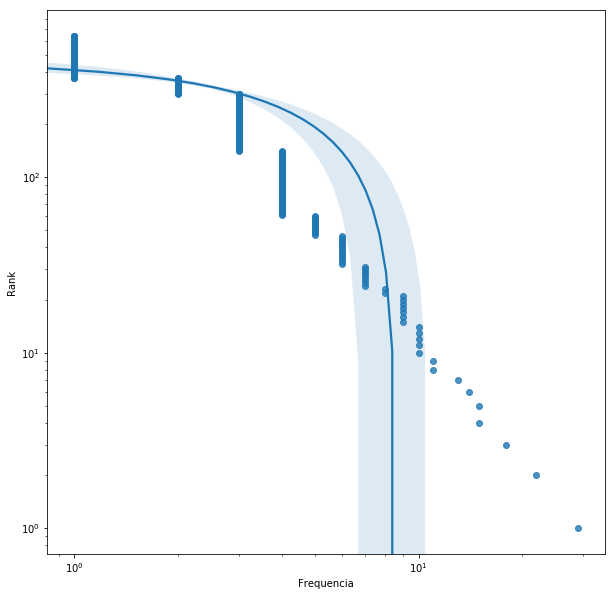

In [27]:


import seaborn as sns
f, ax = plt.subplots(figsize=(10, 10))
ax.set(xscale="log", yscale="log")




sns.regplot(x="Frequencia", y="Rank", data=frequencia_top_50)

In [25]:
bigramas = list(nltk.bigrams(list(tabela_palavras_stemmer['palavra'].values)))


bigramas = pd.DataFrame({
    'Bigrama' : list(nltk.FreqDist(bigramas).keys()),
    'Frequencia' : list(nltk.FreqDist(bigramas).values()),
})

bigramas['Rank'] = bigramas['Frequencia'].rank(ascending=True, method='first')
bigramas = bigramas.sort_values(by='Frequencia')
bigramas.tail()

,Bigrama,Frequencia,Rank
233,"(campo, jordão)",6,869.0
22,"(flávio, bolsonaro)",7,870.0
35,"(nicolá, maduro)",9,871.0
231,"(joão, doria)",10,872.0
65,"(jair, bolsonaro)",19,873.0


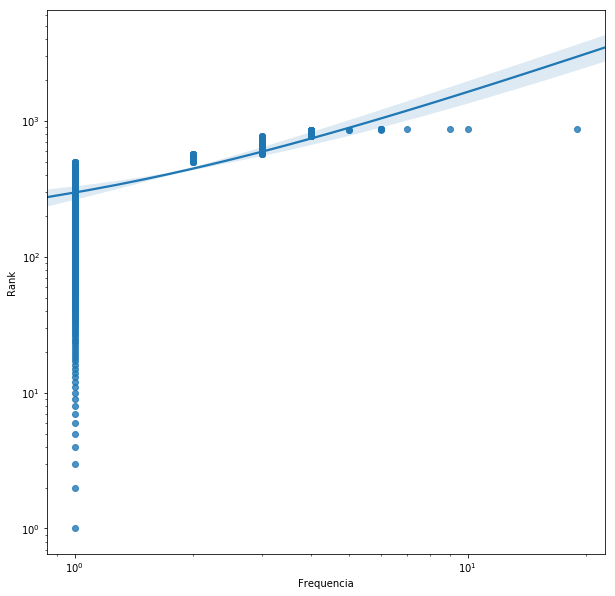

In [28]:
f, ax = plt.subplots(figsize=(10, 10))
ax.set(xscale="log", yscale="log")

sns.regplot(x="Frequencia", y="Rank", data=bigramas)